['.config', 'samolot10.jpg', 'samolot17.jpg', 'samolot16.jpg', '.ipynb_checkpoints', 'samolot11.jpg', 'samolot08.jpg', 'samolot05.jpg', 'sample_data']
['samolot05.jpg', 'samolot08.jpg', 'samolot10.jpg', 'samolot11.jpg', 'samolot16.jpg', 'samolot17.jpg']


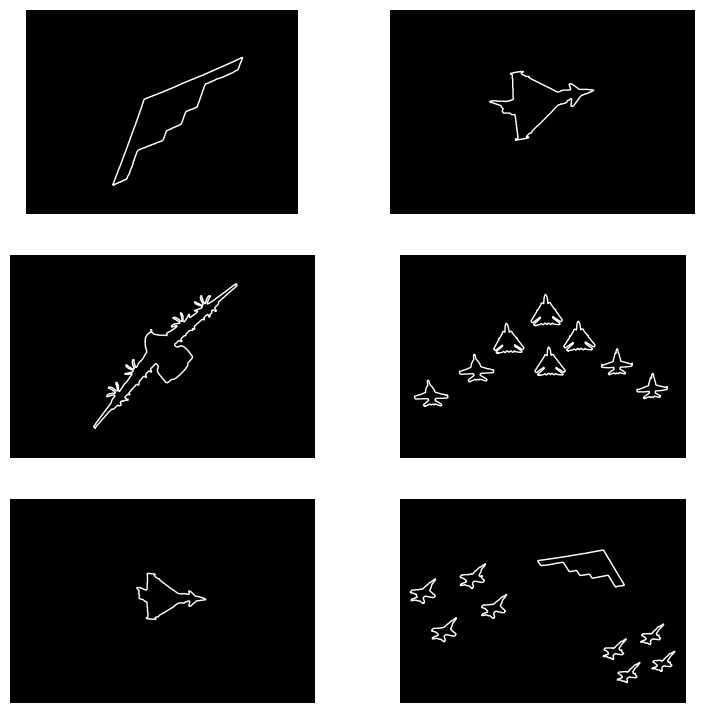

In [69]:
import skimage as ski
import os
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import label, regionprops, find_contours
import numpy as np
from natsort import natsorted, ns
from matplotlib import pyplot as plt
from skimage import color, measure

#filename = os.path.join(ski.data_dir, '/content/samolot00.jpg')
#moon = ski.io.imread(filename)
#ski.io.imshow(moon)
list_files = os.listdir('.')
print(list_files)
list_files = natsorted(list_files)
list_files.pop()
list_files = list_files[2:]
print(list_files)
i = 0
j = 0
images = []
for filename in list_files:
  images.append(ski.io.imread(filename))
fig, axs = plt.subplots(3,2, figsize=(9,9))


for image in images:
  i = i + 1
  if i > 2:
    i = 0
  j = j + 1
  if j > 1:
    j = 0
  gray = color.rgb2gray(image)
  denoised = gaussian(gray, sigma=1.5)
  #ski.io.imshow(denoised)
  thresh = threshold_otsu(denoised)
  binary_image = denoised < thresh
  binary = np.zeros(shape=binary_image.shape)
  binary[binary_image] = 1
  #ski.io.imshow(binary)
  contours = find_contours(binary, level=0.8)

  axs[i, j].imshow(gray, cmap='gray', vmin=0, vmax=255)
  axs[i, j].axis('off')
  for contour in contours:
    axs[i, j].plot(contour[:,1], contour[:,0], linewidth=1, color='white')




plt.show()
#ski.io.imshow(gray)
#ski.io.imshow(denoised)
#ski.io.imshow(binary)